<a href="https://colab.research.google.com/github/Dheerajthummala/Forecasting/blob/main/Forecasting(Cococola_prices).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [128]:
data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [129]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [130]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

Data_driven_method


<Axes: >

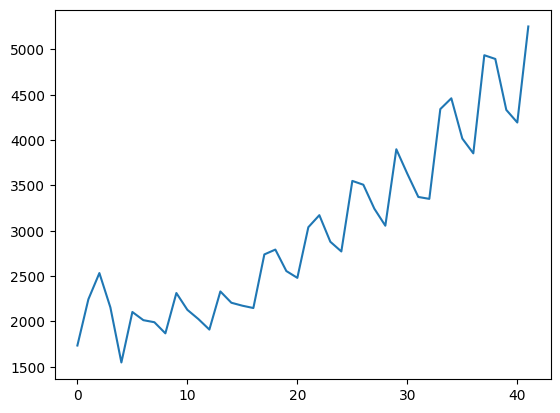

In [132]:
data.Sales.plot()

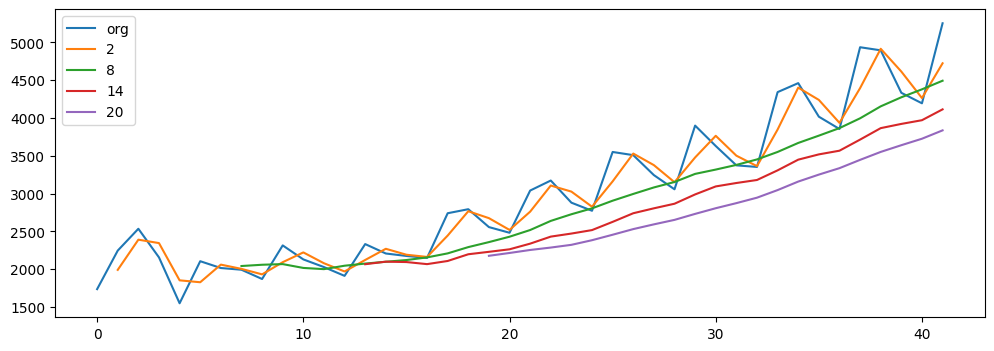

In [133]:
# average smoothing
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,24,6):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

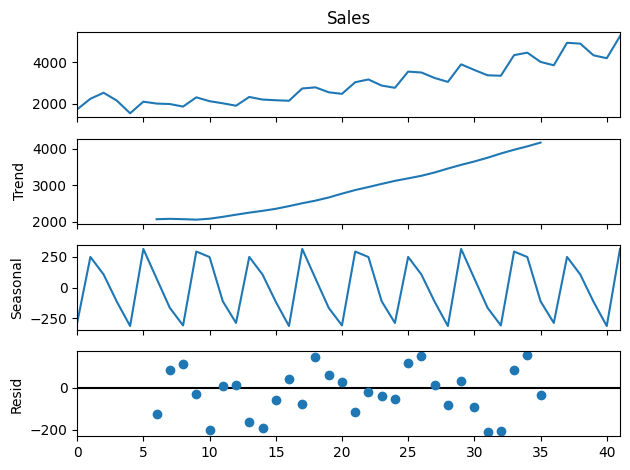

In [134]:
# time series decompostion plot
decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

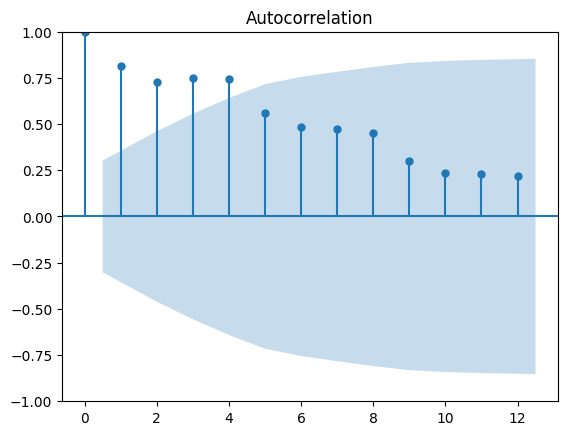

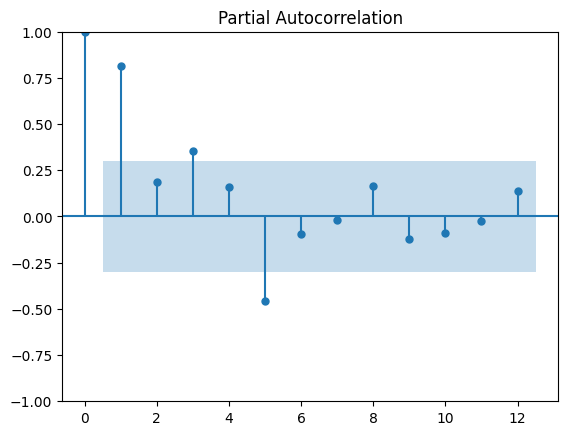

In [135]:
# Acf plots and Pacf plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()


In [137]:
# creating traing and testing data
Train=data.head(80)
Test=data.tail(15)

In [138]:
# Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [139]:
#simple exponential method
Train["Sales"] = Train["Sales"].astype('double')
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


10.755908917339973

In [140]:
# Holt method
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

<ipython-input-140-9b8e4fdf9316>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


12.026604384671764

In [141]:
#Holt Winter Exponential Smoothing Model with additive trend and additive seasonality
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

3.5458648078427784

In [142]:
#Holt Winter Exponential Smoothing Model with additive trend and multiplicative seasonality
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

1.7490062553432166

In [143]:
# as you can see multiplicative seasonality model is better its getting less error
hwe_model_mul_add = ExponentialSmoothing(data["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [144]:
#Forecasting for next 10 time periods
f=hwe_model_mul_add.forecast(15)
f

42    5012.147440
43    4645.260903
44    4490.053377
45    5638.551712
46    5671.720685
47    5107.131442
48    4834.680254
49    6127.684114
50    6109.530409
51    5503.868389
52    5100.552492
53    6447.534541
54    6123.639999
55    5656.701397
56    5450.276674
dtype: float64

In [71]:
# as per given predictions  it is predicting that approx 312 passengers travel in next month of january

<Axes: >

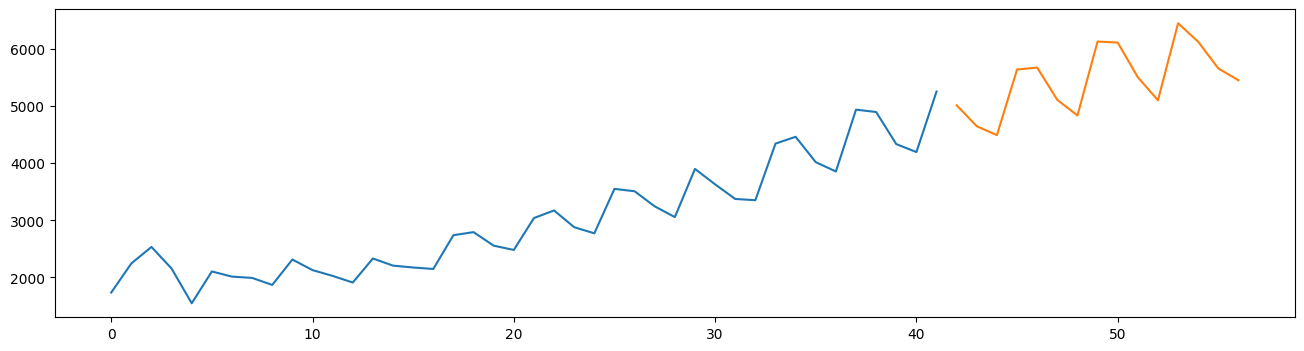

In [146]:
# Forecast Plot
data['Sales'].plot(figsize=(16,4))
f.plot()

model_based_method


In [147]:
data.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [150]:
# Extracting year and quarter number
data[['Quarter', 'Year']] = data['Quarter'].str.split('_', expand=True)
data['Year'] = '19' + data['Year']  # Assuming the years are in the 20th century


In [152]:
# Creating a date column using the quarter number and year
quarters = {'Q1': '01-01', 'Q2': '04-01', 'Q3': '07-01', 'Q4': '10-01'}
data['Date'] = data['Year'] + '-' + data['Quarter'].map(quarters)

In [155]:

# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data

,Quarter,Sales,Year,Date
0,Q1,1734.827000,1986,1986-01-01
1,Q2,2244.960999,1986,1986-04-01
2,Q3,2533.804993,1986,1986-07-01
3,Q4,2154.962997,1986,1986-10-01
4,Q1,1547.818996,1987,1987-01-01
5,Q2,2104.411995,1987,1987-04-01
6,Q3,2014.362999,1987,1987-07-01
7,Q4,1991.746998,1987,1987-10-01
8,Q1,1869.049999,1988,1988-01-01
9,Q2,2313.631996,1988,1988-04-01


In [159]:
# Extracting Day, weekday name, month name, year from the Date column using
# Date functions from pandas
data["Date"]  = pd.to_datetime(data.Date, format="%b-%y")
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["Day"] = data.Date.dt.strftime("%d") # Day extraction
data["weekday"] = data.Date.dt.strftime("%A") # weekday extraction
data.head(10)

,Quarter,Sales,Year,Date,month,Day,weekday
0,Q1,1734.827000,1986,1986-01-01,Jan,01,Wednesday
1,Q2,2244.960999,1986,1986-04-01,Apr,01,Tuesday
2,Q3,2533.804993,1986,1986-07-01,Jul,01,Tuesday
3,Q4,2154.962997,1986,1986-10-01,Oct,01,Wednesday
4,Q1,1547.818996,1987,1987-01-01,Jan,01,Thursday
5,Q2,2104.411995,1987,1987-04-01,Apr,01,Wednesday
6,Q3,2014.362999,1987,1987-07-01,Jul,01,Wednesday
7,Q4,1991.746998,1987,1987-10-01,Oct,01,Thursday
8,Q1,1869.049999,1988,1988-01-01,Jan,01,Friday
9,Q2,2313.631996,1988,1988-04-01,Apr,01,Friday


<Axes: xlabel='month', ylabel='Year'>

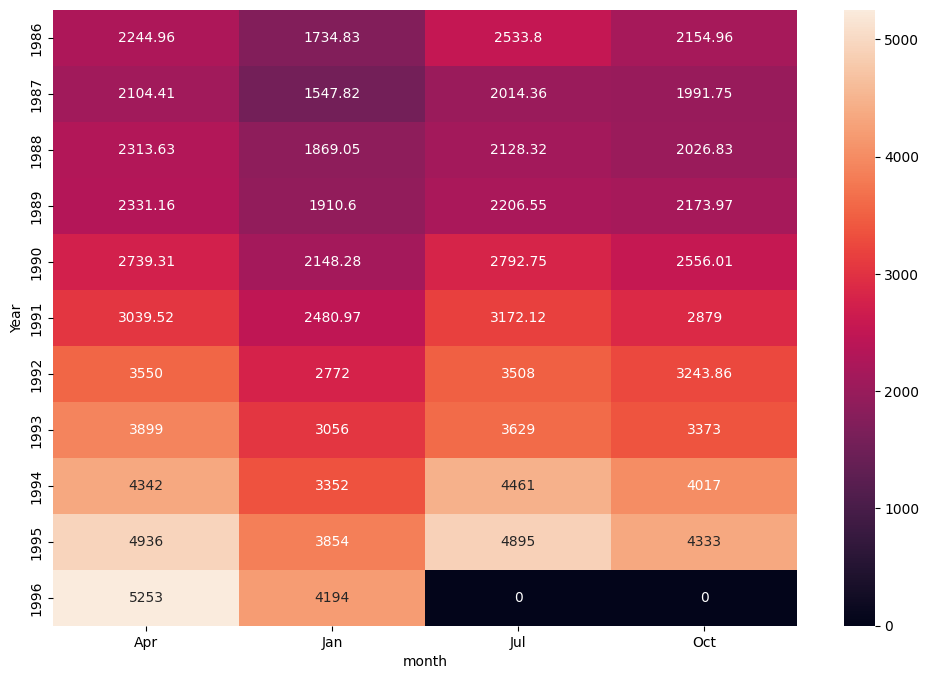

In [161]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Sales",index="Year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


<Axes: xlabel='Year', ylabel='Sales'>

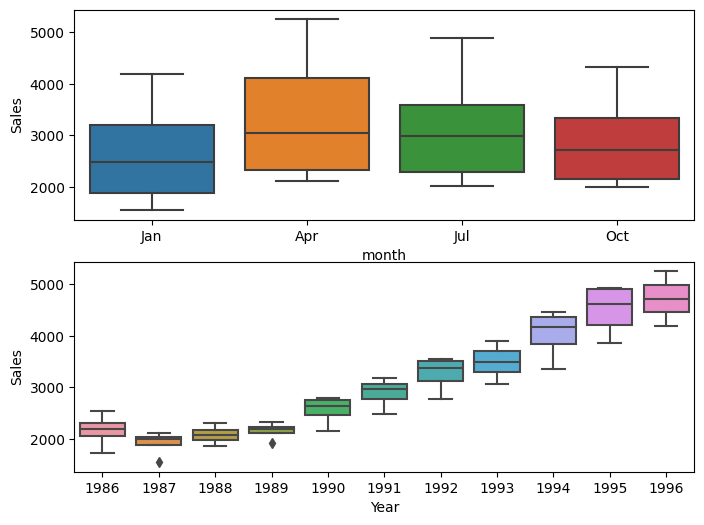

In [162]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=data)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=data)

In [163]:
# as you can see from the above plots
# accordings months most of the sales in the month of april and july
# and year by year the Sales are increasing

<Axes: xlabel='Year', ylabel='Sales'>

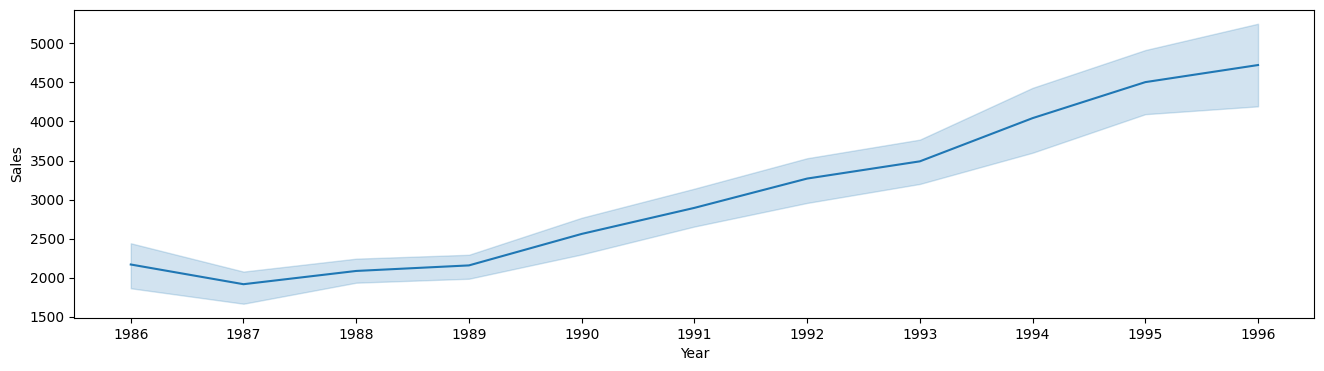

In [164]:
# Line plot of year vs Sales
plt.figure(figsize=(16,4))
sns.lineplot(x='Year',y='Sales',data=data)

In [165]:
# Converting categorical data into numerical data
month_dummies=pd.DataFrame(pd.get_dummies(data['month']))
month_dummies

,Apr,Jan,Jul,Oct
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0
5,1,0,0,0
6,0,0,1,0
7,0,0,0,1
8,0,1,0,0
9,1,0,0,0


In [166]:
# As you can see 4 dummie varuibles we created
# combining these to data
data1=pd.concat([data,month_dummies],axis=1)
data1

,Quarter,Sales,Year,Date,month,Day,weekday,Apr,Jan,Jul,Oct
0,Q1,1734.827000,1986,1986-01-01,Jan,01,Wednesday,0,1,0,0
1,Q2,2244.960999,1986,1986-04-01,Apr,01,Tuesday,1,0,0,0
2,Q3,2533.804993,1986,1986-07-01,Jul,01,Tuesday,0,0,1,0
3,Q4,2154.962997,1986,1986-10-01,Oct,01,Wednesday,0,0,0,1
4,Q1,1547.818996,1987,1987-01-01,Jan,01,Thursday,0,1,0,0
5,Q2,2104.411995,1987,1987-04-01,Apr,01,Wednesday,1,0,0,0
6,Q3,2014.362999,1987,1987-07-01,Jul,01,Wednesday,0,0,1,0
7,Q4,1991.746998,1987,1987-10-01,Oct,01,Thursday,0,0,0,1
8,Q1,1869.049999,1988,1988-01-01,Jan,01,Friday,0,1,0,0
9,Q2,2313.631996,1988,1988-04-01,Apr,01,Friday,1,0,0,0


In [171]:
# creating t, t_squared and log_passengers columns
data1['t']=np.arange(1,43)
data1['t_squared']=data1['t']*data1['t']
data1['log_Sales']=np.log(data1['Sales'])
data1

,Quarter,Sales,Year,Date,month,Day,weekday,Apr,Jan,Jul,Oct,t,t_squared,log_Sales
0,Q1,1734.827000,1986,1986-01-01,Jan,01,Wednesday,0,1,0,0,1,1,7.458663
1,Q2,2244.960999,1986,1986-04-01,Apr,01,Tuesday,1,0,0,0,2,4,7.716443
2,Q3,2533.804993,1986,1986-07-01,Jul,01,Tuesday,0,0,1,0,3,9,7.837477
3,Q4,2154.962997,1986,1986-10-01,Oct,01,Wednesday,0,0,0,1,4,16,7.675529
4,Q1,1547.818996,1987,1987-01-01,Jan,01,Thursday,0,1,0,0,5,25,7.344602
5,Q2,2104.411995,1987,1987-04-01,Apr,01,Wednesday,1,0,0,0,6,36,7.651791
6,Q3,2014.362999,1987,1987-07-01,Jul,01,Wednesday,0,0,1,0,7,49,7.608058
7,Q4,1991.746998,1987,1987-10-01,Oct,01,Thursday,0,0,0,1,8,64,7.596767
8,Q1,1869.049999,1988,1988-01-01,Jan,01,Friday,0,1,0,0,9,81,7.533186
9,Q2,2313.631996,1988,1988-04-01,Apr,01,Friday,1,0,0,0,10,100,7.746574


In [172]:
Train = data1.head(80)
Test = data1.tail(15)

In [173]:
#Linear Model
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

431.7994415690708

In [174]:
#Exponential
exp_model=smf.ols('log_Sales~t',data=Train).fit()
pred_exp=exp_model.predict(Test['t'])
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_Exp

399.10160837656923

In [175]:
#Quadratic

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

378.6445652695611

In [176]:
#Additive seasonality

add_sea = smf.ols('Sales~Apr+Jan+Jul+Oct',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Apr','Jan','Jul','Oct']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1185.6545029195513

In [177]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Sales~t+t_squared+Apr+Jan+Jul+Oct',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Apr','Jan','Jul','Oct','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

157.85145830299447

In [178]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Apr+Jan+Jul+Oct',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1311.2517033920021

In [179]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_Sales~t+Apr+Jan+Jul+Oct',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

155.0005904440448

In [180]:
#Compare the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,155.000590
4,rmse_add_sea_quad,157.851458
2,rmse_Quad,378.644565
1,rmse_Exp,399.101608
0,rmse_linear,431.799442
3,rmse_add_sea,1185.654503
5,rmse_Mult_sea,1311.251703


In [181]:
# Build the model on entire data set using mul_add_sea_model

model_final=smf.ols('log_Sales~Apr+Jan+Jul+Oct+t',data=Train).fit()

In [182]:
pred_new=model_final.predict(Test)
pred_new=np.exp(pred_new)
pred_new

27    3201.147210
28    3028.744108
29    3852.302464
30    3820.005302
31    3526.048155
32    3336.146973
33    4243.292516
34    4207.717347
35    3883.924973
36    3674.749740
37    4673.966165
38    4634.780289
39    4278.124557
40    4047.719050
41    5148.351104
dtype: float64